In [1]:
import os
import numpy as np
import pandas as pd
from numpy import linalg
from surprise import Reader, Dataset
from surprise import SVD
from surprise import SVDpp
os.chdir('C:/Users/dimav/Desktop/pet_proj/Recommendation system of films/data/')

In [2]:
df = pd.read_csv('ratings.csv', delimiter=',')
df = df.drop(['timestamp'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [6]:
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


C:\Users\dimav\.conda\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

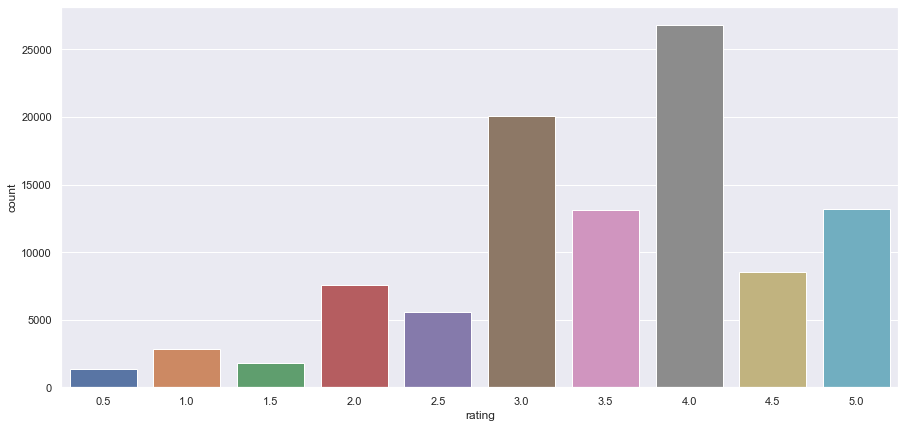

In [7]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.countplot(df['rating'])

In [5]:
real=df.groupby(['rating'])['userId'].count()
real=pd.DataFrame(real)
fig = px.line(real)
fig.show()

In [8]:
real=df.groupby(['rating'])['movieId'].count()
real=pd.DataFrame(real)
fig = px.line(real)
fig.show()

In [12]:
real=df.groupby(['userId'])['rating'].count()
real=pd.DataFrame(real)
fig = px.line(real)
fig.show()

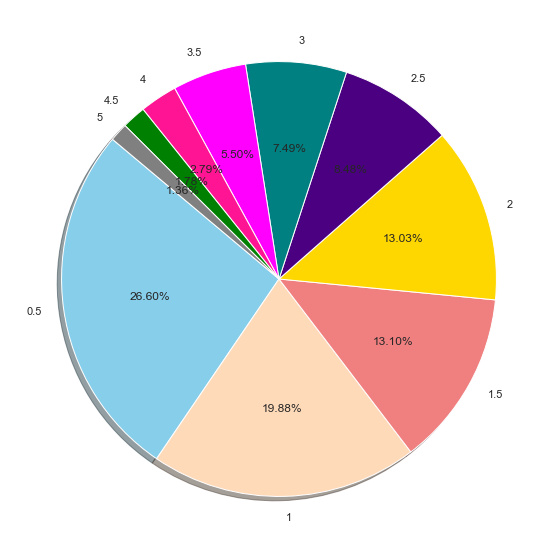

In [8]:
plt.figure(figsize=(15,10))
labels=['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
colors = ["SkyBlue","PeachPuff",'lightcoral','gold','indigo','teal','magenta','deeppink','green','gray']
plt.pie(df['rating'].value_counts(),labels=labels,colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140) 
plt.show()



In [3]:
df['userId'] = df['userId'].astype(str)
df['movieId'] = df['movieId'].astype(str)
df['userId'] = 'person_'+df['userId'].astype(str)
df['movieId'] = 'movie_'+df['movieId'].astype(str)

In [4]:
df_new=df.copy()

df_new=df_new.rename(columns={"movieId": "userId/movieId"})

In [5]:
df_new = df_new.pivot_table(index=['userId'], columns='userId/movieId', values='rating', aggfunc=np.sum).reset_index()

df_new.index=df_new['userId'].values

df_new=df_new.drop(['userId'], axis=1)

df_new

userId/movieId,movie_1,movie_10,movie_100,movie_100044,movie_100068,movie_100083,movie_100106,movie_100159,movie_100163,movie_100194,...,movie_99750,movie_99764,movie_998,movie_99813,movie_99846,movie_99853,movie_999,movie_99910,movie_99917,movie_99992
person_1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_96,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_98,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
minimum_rating = min(df['rating'].values)
maximum_rating = max(df['rating'].values)
print(minimum_rating,maximum_rating)

0.5 5.0


In [18]:
reader = Reader(rating_scale=(minimum_rating,maximum_rating))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [19]:
svdplpl = SVDpp(lr_all=0.005, reg_all=0.02)
svdplpl.fit(data.build_full_trainset())
df_svdplpl=df_new.copy()
for user in df_new.index:
    for movie in df_new.columns:
        if str(df_svdplpl.loc[user, movie])=='nan':
            df_svdplpl.at[user, movie] = round(svdplpl.predict(user, movie).est,4)
df_svdplpl

userId/movieId,movie_1,movie_10,movie_100,movie_100044,movie_100068,movie_100083,movie_100106,movie_100159,movie_100163,movie_100194,...,movie_99750,movie_99764,movie_998,movie_99813,movie_99846,movie_99853,movie_999,movie_99910,movie_99917,movie_99992
person_1,4.0000,4.1854,3.8319,4.2825,4.1596,4.2187,4.1043,4.3238,3.9631,4.4173,...,4.2365,4.5198,4.0768,4.6062,4.1884,4.3357,4.1575,4.2547,4.3388,4.3018
person_10,3.6309,3.2387,2.8525,3.2064,3.2998,3.3112,3.3868,3.0798,2.8822,3.1586,...,3.3005,3.4449,3.4476,2.9722,3.2814,3.1872,3.0506,3.0122,3.2547,3.2320
person_100,4.0420,3.8121,3.4590,3.8533,3.8618,3.7885,3.8382,3.8745,3.7196,3.9136,...,3.7984,4.0737,3.9096,4.0774,3.8796,3.8721,3.7765,3.8186,3.9358,3.8703
person_101,3.8646,3.5055,3.0610,3.5536,3.4794,3.4775,3.4098,3.6235,3.2696,3.6379,...,3.4296,3.7613,3.3458,3.8326,3.4823,3.5408,3.4103,3.4861,3.6000,3.5310
person_102,3.9713,3.4388,2.7906,3.3435,3.2949,3.5160,3.3296,3.4137,3.2282,3.5023,...,3.4145,3.6391,3.2956,3.7004,3.4937,3.3680,3.2532,3.3314,3.4153,3.3863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_95,4.2724,3.9075,3.3497,3.8818,3.7565,3.8573,3.6930,3.9899,3.5937,4.0164,...,3.8643,4.1065,3.5379,4.2594,3.7738,3.8914,3.8283,3.8645,3.9142,3.9062
person_96,5.0000,3.5388,3.2171,3.6635,3.6537,3.5698,3.4999,3.8043,3.4789,3.7530,...,3.5353,3.9048,3.4368,4.1315,3.6692,3.5605,3.5537,3.5843,3.6546,3.5682
person_97,4.3643,4.1217,3.6420,4.0796,3.9933,4.0149,4.0214,4.2241,3.9823,4.2372,...,4.0757,4.2656,3.9459,4.4521,4.1093,4.1396,4.0094,4.0201,4.0945,4.1353
person_98,4.5000,3.6442,3.3508,3.7907,3.6716,3.7472,3.6645,3.7509,3.6443,3.8140,...,3.6956,4.0689,3.6683,4.0064,3.7926,3.8594,3.5355,3.6315,3.9144,3.8906


manual svd++

In [7]:
i_bound=10

In [8]:
import random
from sklearn.metrics import mean_squared_error
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [9]:
df_train=df_new.copy()
df_train=df_train.fillna(0)
df_train=df_train.loc[df_train.index[0:20],:].copy()

df_train_sum=pd.DataFrame(df_train.sum()).copy()

cols=df_train_sum[df_train_sum[0]!=0].index[0:20].tolist()
df_train=df_train.loc[:,cols].copy()

df_train_sum2=pd.DataFrame(df_train.T.sum()).copy()

inds=df_train_sum2[df_train_sum2[0]!=0].index.tolist()
df_train=df_train.loc[inds,:].copy()

df_train

userId/movieId,movie_1,movie_10,movie_100083,movie_100194,movie_100302,movie_100390,movie_100507,movie_100553,movie_100714,movie_1009,movie_101,movie_101088,movie_101142,movie_1012,movie_1013,movie_1014,movie_1015,movie_1018,movie_101962,movie_1020
person_1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
person_103,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0
person_104,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
person_105,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.5,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
person_107,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
person_109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
person_11,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
person_111,0.0,0.0,2.0,4.5,0.0,4.5,4.5,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0
person_112,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
person_113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,3.0,0.0,0.0


In [10]:
df_bi = pd.DataFrame([random.random() for i in range(df_train.shape[0])])
df_bi['person_id']=df_train.index
df_bi.columns=['bi_value', 'person_id']
df_bi=df_bi.loc[:,['person_id','bi_value']]
for i in range(i_bound):
    df_bi['pi_value_'+str(i)]=[random.random() for i in range(df_train.shape[0])]
df_bi

,person_id,bi_value,pi_value_0,pi_value_1,pi_value_2,pi_value_3,pi_value_4,pi_value_5,pi_value_6,pi_value_7,pi_value_8,pi_value_9
0,person_1,0.494183,0.958637,0.649358,0.545584,0.604753,0.929844,0.344897,0.314152,0.799828,0.083107,0.449746
1,person_103,0.880933,0.621118,0.202893,0.548834,0.295633,0.985228,0.294739,0.366665,0.095410,0.774374,0.648922
2,person_104,0.212187,0.045375,0.901978,0.752010,0.292790,0.532792,0.502043,0.445555,0.254079,0.862799,0.141438
3,person_105,0.153928,0.260789,0.145936,0.729722,0.451273,0.530005,0.786826,0.427328,0.046906,0.816572,0.715813
4,person_107,0.113244,0.674794,0.807883,0.770531,0.099916,0.311471,0.102841,0.614277,0.476197,0.860381,0.968510
5,person_109,0.608140,0.792074,0.305688,0.329385,0.220048,0.051818,0.639299,0.061423,0.645856,0.367246,0.389476
6,person_11,0.471623,0.579898,0.365380,0.261897,0.393418,0.609791,0.599946,0.624958,0.311855,0.292278,0.169559
7,person_111,0.755431,0.152011,0.727925,0.619809,0.982918,0.605384,0.157943,0.346635,0.732205,0.963529,0.929203
8,person_112,0.938856,0.969145,0.422813,0.639787,0.880993,0.444905,0.699584,0.175528,0.358607,0.183349,0.879982
9,person_113,0.121738,0.526363,0.897925,0.973916,0.625022,0.585500,0.081262,0.316492,0.577236,0.554648,0.800289


In [11]:
df_ba = pd.DataFrame([random.random() for i in range(df_train.shape[1])])
df_ba['movie_id']=df_train.columns
df_ba.columns=['ba_value', 'movie_id']
df_ba=df_ba.loc[:,['movie_id','ba_value']]
for i in range(i_bound):
    df_ba['qa_value_'+str(i)]=[random.random() for i in range(df_train.shape[1])]
df_ba

,movie_id,ba_value,qa_value_0,qa_value_1,qa_value_2,qa_value_3,qa_value_4,qa_value_5,qa_value_6,qa_value_7,qa_value_8,qa_value_9
0,movie_1,0.082836,0.459326,0.918457,0.444124,0.748819,0.641469,0.539740,0.034743,0.347684,0.109699,0.701311
1,movie_10,0.241771,0.657511,0.105458,0.477569,0.404012,0.354454,0.833911,0.112570,0.392988,0.228484,0.807853
2,movie_100083,0.113136,0.327197,0.328171,0.032734,0.935662,0.817489,0.576023,0.128071,0.478568,0.315726,0.689243
3,movie_100194,0.829792,0.465988,0.236472,0.882589,0.732540,0.550251,0.922523,0.940223,0.969785,0.547337,0.730969
4,movie_100302,0.682568,0.559170,0.867298,0.905075,0.198089,0.934119,0.289361,0.273292,0.784816,0.040587,0.622421
5,movie_100390,0.376372,0.777571,0.703231,0.907403,0.061244,0.198192,0.023449,0.352630,0.825865,0.222701,0.494523
6,movie_100507,0.806637,0.173470,0.922874,0.638287,0.377103,0.517181,0.208979,0.156731,0.913710,0.042923,0.317693
7,movie_100553,0.952982,0.763531,0.749014,0.481213,0.874878,0.554152,0.660177,0.500171,0.785880,0.936609,0.295531
8,movie_100714,0.893112,0.308813,0.299334,0.966581,0.209229,0.642209,0.224705,0.200188,0.462487,0.209029,0.985301
9,movie_1009,0.280804,0.848926,0.103445,0.549190,0.503298,0.669315,0.539917,0.187230,0.006961,0.349550,0.325674


In [12]:
df_train_fit=df_train.copy().reset_index()
df_train_fit=df_train_fit.rename(columns={"index": "person_id"})

lc = len(df_train_fit.columns)
df_train_fit = pd.melt(df_train_fit
                 , id_vars=['person_id'], value_vars = df_train_fit.columns[1:lc],
                var_name='movie_id', value_name='rating')
df_train_fit = df_train_fit[df_train_fit['rating']!=0.0].copy()
df_train_fit.reset_index(drop=True, inplace=True)
df_train_fit

,person_id,movie_id,rating
0,person_1,movie_1,4.0
1,person_103,movie_1,4.0
2,person_107,movie_1,4.0
3,person_112,movie_1,3.0
4,person_104,movie_10,3.0
5,person_11,movie_10,3.0
6,person_111,movie_100083,2.0
7,person_111,movie_100194,4.5
8,person_105,movie_100302,3.0
9,person_111,movie_100390,4.5


In [13]:
def analyse_errors(big_df, df_bi, df_ba, mu, i_bound):
    big_df = big_df.merge(df_bi, how='left', on=['person_id'])
    big_df = big_df.merge(df_ba, how='left', on=['movie_id'])
    big_df['vect_dot']=0

    for i in range(i_bound):
        big_df['vect_dot'] = big_df['vect_dot'] + big_df['pi_value_'+str(i)]*big_df['qa_value_'+str(i)]

    big_df['rating_pred']=mu + big_df['bi_value'] + big_df['ba_value'] + big_df['vect_dot']
    return big_df, np.sqrt(mean_squared_error(big_df['rating'].values, big_df['rating_pred'].values))

In [14]:
def svd_plus_plus_fitting(df_train_fit, df_bi, df_ba, n_steps, gamma, lambdaa, i_bound):
    first_rmse = 0
    last_rmse = 0
    steps=[]
    rmses=[]
    target_line=[]
    mu = df_train_fit.mean().mean()

    for step in range(n_steps):
        steps.append(step)

        part = random.sample(range(0, df_train_fit.shape[0]), 1)
        item = df_train_fit.loc[part,:]
        item.reset_index(drop=True, inplace=True)

        item, _ = analyse_errors(big_df=item, df_bi=df_bi, df_ba=df_ba, mu=mu, i_bound=i_bound)
        _, rmse = analyse_errors(big_df=df_train_fit, df_bi=df_bi, df_ba=df_ba, mu=mu, i_bound=i_bound)

        if (step==0):
            first_rmse=rmse
        else:
            last_rmse=rmse

        rmses.append(rmse)
        target_line.append(0)

        item['rating_error']=item['rating'] - item['rating_pred']
        movem = item['rating_error'].values.tolist()[0]
        item=item.drop(['rating','vect_dot','rating_pred'], axis=1)

        item['bi_value'] = item['bi_value'] + gamma*(item['rating_error'] - lambdaa*item['bi_value'])
        item['ba_value'] = item['ba_value'] + gamma*(item['rating_error'] - lambdaa*item['ba_value'])

        copy_pi_vector_pi = item[item.columns[3:(i_bound+3)]].copy()
        copy_pi_vector_qa = item[item.columns[(i_bound+4):(len(item.columns)-1)]].copy()
        copy_pi_vector_qa.columns = copy_pi_vector_pi.columns

        copy_qa_vector_pi = item[item.columns[3:(i_bound+3)]].copy()
        copy_qa_vector_qa = item[item.columns[(i_bound+4):(len(item.columns)-1)]].copy()
        copy_qa_vector_pi.columns = copy_qa_vector_qa.columns

        item[item.columns[3:(i_bound+3)]] = copy_pi_vector_pi + gamma*(copy_pi_vector_qa*movem - 
                                                                      lambdaa*copy_pi_vector_pi)
        item[item.columns[(i_bound+4):(len(item.columns)-1)]] = copy_qa_vector_qa + gamma*(copy_qa_vector_pi*movem - 
                                                                                           lambdaa*copy_qa_vector_qa)

        item = item.drop(['rating_error'], axis=1)
        item_bi = item[item.columns[0:1].tolist() + item.columns[2:(i_bound+3)].tolist()].copy()
        item_ba = item[item.columns[1:2].tolist() + item.columns[(i_bound+3):].tolist()].copy()

        pids = item_bi['person_id'].values.tolist()
        mids = item_ba['movie_id'].values.tolist()

        item_bi.index = df_bi[df_bi['person_id'].isin(pids)].index
        df_bi[df_bi['person_id'].isin(pids)]=item_bi

        item_ba.index=df_ba[df_ba['movie_id'].isin(mids)].index
        df_ba[df_ba['movie_id'].isin(mids)]=item_ba

        print('ITERATION NUMBER:',(step+1),' of ',n_steps,'RMSE=',rmse)

    return df_bi, df_ba

In [15]:
n_steps=5000
gamma = 0.00095
lambdaa = 0.00005

In [16]:
df_bi_new, df_ba_new = svd_plus_plus_fitting(df_train_fit=df_train_fit, df_bi=df_bi, df_ba=df_ba, 
                      n_steps=n_steps, gamma=gamma, lambdaa=lambdaa, i_bound=i_bound)

C:\Users\dimav\AppData\Local\Temp/ipykernel_11880/2128303346.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu = df_train_fit.mean().mean()


ITERATION NUMBER: 1  of  5000 RMSE= 3.763246995001634
ITERATION NUMBER: 2  of  5000 RMSE= 3.7610501141832486
ITERATION NUMBER: 3  of  5000 RMSE= 3.754542842966991
ITERATION NUMBER: 4  of  5000 RMSE= 3.753826804299981
ITERATION NUMBER: 5  of  5000 RMSE= 3.7520257908536263
ITERATION NUMBER: 6  of  5000 RMSE= 3.7501715159302855
ITERATION NUMBER: 7  of  5000 RMSE= 3.7462963331798877
ITERATION NUMBER: 8  of  5000 RMSE= 3.7453721467354524
ITERATION NUMBER: 9  of  5000 RMSE= 3.73807267438248
ITERATION NUMBER: 10  of  5000 RMSE= 3.7355002088660494
ITERATION NUMBER: 11  of  5000 RMSE= 3.7335341926848136
ITERATION NUMBER: 12  of  5000 RMSE= 3.729728144641951
ITERATION NUMBER: 13  of  5000 RMSE= 3.7278609523509636
ITERATION NUMBER: 14  of  5000 RMSE= 3.7215608472177335
ITERATION NUMBER: 15  of  5000 RMSE= 3.7196281984465767
ITERATION NUMBER: 16  of  5000 RMSE= 3.712869625844506
ITERATION NUMBER: 17  of  5000 RMSE= 3.7115989883095555
ITERATION NUMBER: 18  of  5000 RMSE= 3.7090846922812872
ITERATIO

In [17]:
mu = df_train_fit.mean().mean()

C:\Users\dimav\AppData\Local\Temp/ipykernel_11880/2926650055.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu = df_train_fit.mean().mean()


In [18]:
l_bound=0.5
u_bound=5
df_svd_pp=df_train.copy()
for usr in df_train.index:
    for flm in df_train.columns:
        if df_svd_pp.loc[usr, flm]==0.0:
            v1=df_ba_new[df_ba_new['movie_id']==flm][df_ba_new.columns[2:]].values[0]
            v2=df_bi_new[df_bi_new['person_id']==usr][df_bi_new.columns[2:]].values[0]
            ba_value = df_ba_new[df_ba_new['movie_id']==flm]['ba_value'].values.tolist()[0]
            bi_value = df_bi_new[df_bi_new['person_id']==usr]['bi_value'].values.tolist()[0]
            rate = mu + bi_value + ba_value + round(np.dot(v1,v2),4)
            if rate<l_bound:
                rate=l_bound
            elif rate>u_bound:
                rate=u_bound
            df_svd_pp.at[usr, flm] = rate

In [19]:
df_svd_pp

userId/movieId,movie_1,movie_10,movie_100083,movie_100194,movie_100302,movie_100390,movie_100507,movie_100553,movie_100714,movie_1009,movie_101,movie_101088,movie_101142,movie_1012,movie_1013,movie_1014,movie_1015,movie_1018,movie_101962,movie_1020
person_1,4.000000,4.167519,4.840437,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.855159,4.801626,4.916975,5.000000,5.000000
person_103,4.000000,4.070904,4.105822,4.957584,4.913911,4.592441,4.617908,5.0,5.000000,4.561076,4.000000,4.098124,4.466344,4.000000,4.232604,4.481544,3.000000,4.442659,4.871854,4.602190
person_104,4.017442,3.000000,4.342161,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,4.488616,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.934999,5.000000,5.000000
person_105,2.661604,3.454605,3.438823,4.967985,3.000000,3.505742,3.696610,4.5,4.000000,4.022778,3.831509,4.000000,4.360646,4.303256,3.392105,4.517145,3.638912,4.321761,4.000000,3.929592
person_107,4.000000,4.570953,4.732371,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,4.879825,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
person_109,3.341691,4.105793,3.916510,4.911073,4.593200,4.694229,4.812797,5.0,4.647483,3.963865,4.572096,4.124913,4.702233,4.639144,4.654092,4.175133,3.000000,4.383648,4.911143,3.000000
person_11,3.856982,3.000000,4.811301,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,4.683956,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
person_111,3.090191,2.986992,2.000000,4.500000,4.290799,4.500000,4.500000,5.0,4.727483,3.386764,3.793396,4.162412,3.500000,4.131443,4.220192,4.250232,3.736999,3.758048,4.588742,4.000000
person_112,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
person_113,3.414286,3.243187,3.708805,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,3.696659,4.175091,4.856607,4.468227,4.657838,5.000000,5.000000,4.226794,3.000000,5.000000,4.444074


In [20]:
df_svd_pp.max().max()

5.0

In [21]:
df_svd_pp.min().min()

2.0

In [22]:
df_svd_pp.apply(lambda x: sum(x.isnull()), axis=0).unique()

array([0], dtype=int64)